## 1. Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

## 2. Reading the data as a data frame

In [2]:
raw_data = pd.read_csv('insurance.csv')
raw_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Counting the data entries in the dataframe

In [3]:
raw_data.count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

## 3. Performing basic EDA

## a) Shape of the data

In [4]:
raw_data.shape

(1338, 7)

## b) Data type of each attribute

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


## c) Checking the presence of missing values

In [6]:
raw_data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## d) 5 point summary of numerical attributes

In [7]:
raw_data.describe().T

## .T is used to Transpose the data table to make it easier to infer the data from it.

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [8]:
## Plotting the Boxplot Diagrams for all the attributes of the dataset.

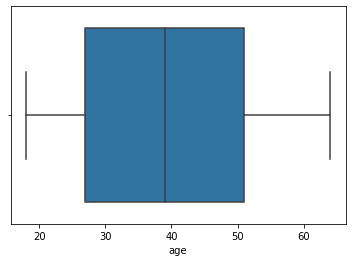

In [9]:
sns.boxplot(raw_data.age)

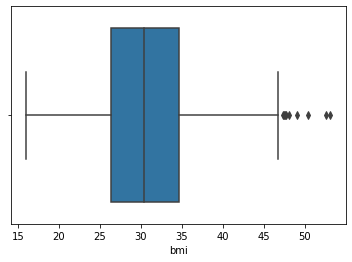

In [10]:
sns.boxplot(raw_data.bmi)

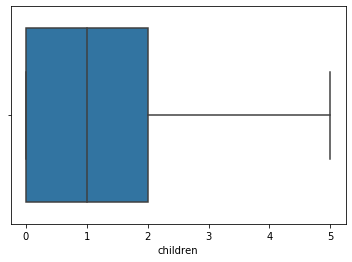

In [11]:
sns.boxplot(raw_data.children)

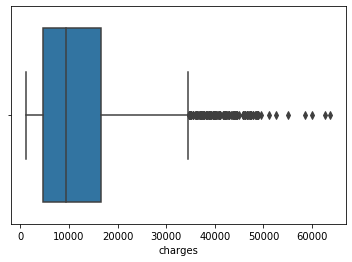

In [12]:
sns.boxplot(raw_data.charges)

## e) Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

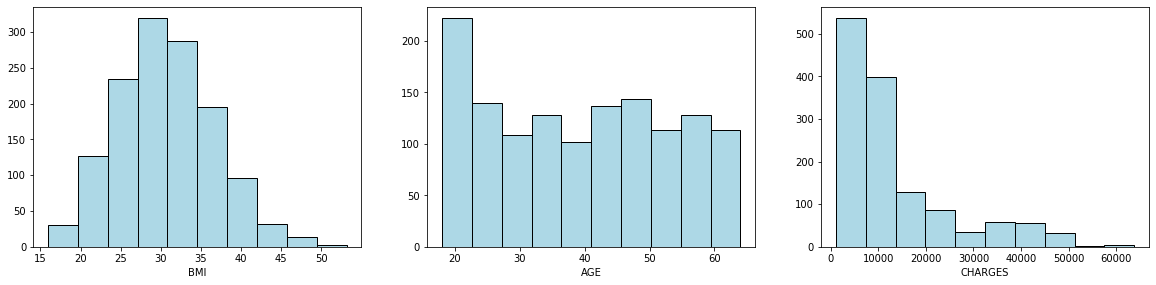

In [13]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
plt.hist(raw_data.bmi, color='lightblue', edgecolor ='black')
plt.xlabel('BMI')

plt.subplot(3,3,2)
plt.hist(raw_data.age, color='lightblue', edgecolor ='black')
plt.xlabel('AGE')

plt.subplot(3,3,3)
plt.hist(raw_data.charges, color='lightblue', edgecolor ='black')
plt.xlabel('CHARGES')

plt.show()

## plt.figure is used to fix the the size of histograms.
## plt.subplot is used so that histograms can be viewed side-by-side.

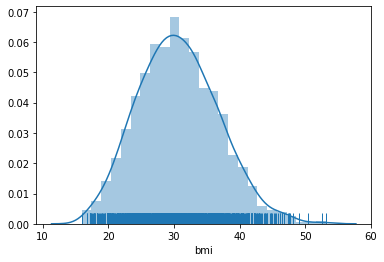

In [14]:
sns.distplot(raw_data.bmi, kde=True, rug=True);

## BMI follows a normal distribution pattern.

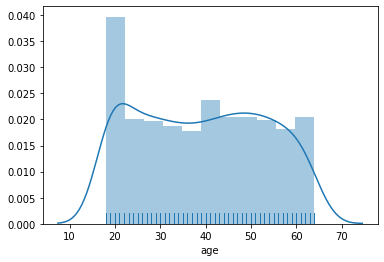

In [15]:
sns.distplot(raw_data.age, kde=True, rug=True);

## Age follows a unifor distribution pattern.

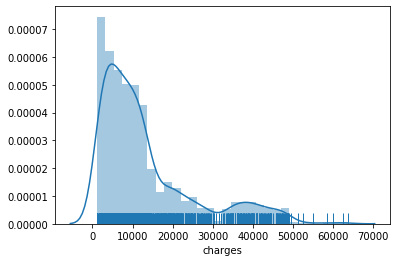

In [16]:
sns.distplot(raw_data.charges, kde=True, rug=True);

## Charges plot is quite skewed to the right.

## f) Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [17]:
Skew = pd.DataFrame({'Skewness' : [stats.skew(raw_data.bmi),
                                 stats.skew(raw_data.age),
                                 stats.skew(raw_data.charges)]},
                   index = ['BMI', 'AGE', 'CHARGES'])
Skew

,Skewness
BMI,0.283729
AGE,0.055610
CHARGES,1.514180


Skew of BMI is very less as evident from the numeric value of skewness.
Similarly, Age has almost negligible skew as seen in the distribution graph of Age above.
But the Charges has shown a high right skew value which validates our distribution chart.

## g) Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

In [18]:
## Calculating Number of Outliers for BMI

q1, q2 = np.percentile(raw_data.bmi,25), np.percentile(raw_data.bmi,75)
iqr = q2 - q1
cutoff = 1.5 * iqr
lower, upper = q1 - cutoff, q2 + cutoff

outliers = [x for x in raw_data.bmi if x < lower or x > upper]
print('No of Outliers identified is :', len(outliers))

No of Outliers identified is : 9


In [19]:
## Calculating Number of Outliers for AGE

q1, q2 = np.percentile(raw_data.age,25), np.percentile(raw_data.age,75)
iqr = q2 - q1
cutoff = 1.5 * iqr
lower, upper = q1 - cutoff, q2 + cutoff

outliers = [x for x in raw_data.age if x < lower or x > upper]
print('No of Outliers identified is :', len(outliers))

No of Outliers identified is : 0


In [20]:
## Calculating Number of Outliers for CHARGES

q1, q2 = np.percentile(raw_data.charges,25), np.percentile(raw_data.charges,75)
iqr = q2 - q1
cutoff = 1.5 * iqr
lower, upper = q1 - cutoff, q2 + cutoff

outliers = [x for x in raw_data.charges if x < lower or x > upper]
print('No of Outliers identified is :', len(outliers))

No of Outliers identified is : 139


## h) Distribution of categorical columns (include children)

We will distribute the categorical plots in two types : Univariate and Bivariate plots.

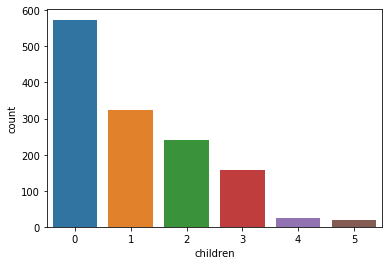

In [21]:
## Univariate

sns.countplot(raw_data.children)

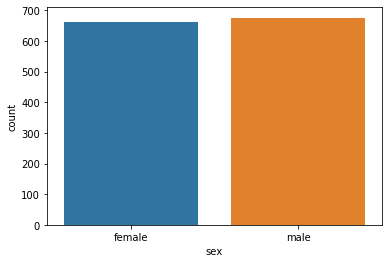

In [22]:
sns.countplot(raw_data.sex)

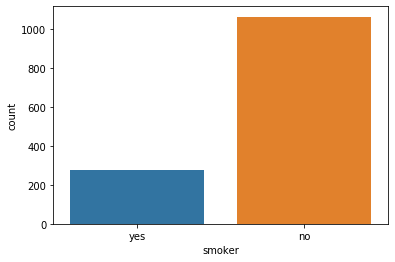

In [23]:
sns.countplot(raw_data.smoker)

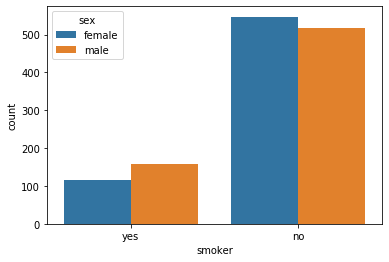

In [24]:
sns.countplot(raw_data.smoker, hue = raw_data.sex)

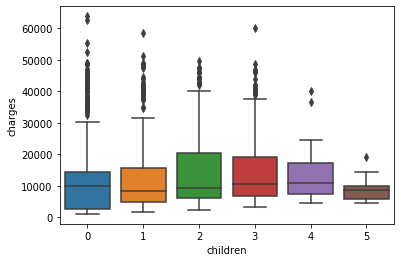

In [25]:
## Bivariate Plots


sns.boxplot(data = raw_data, x = 'children', y = 'charges')

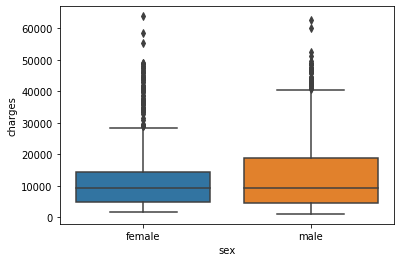

In [26]:
sns.boxplot(data = raw_data, x = 'sex', y = 'charges')

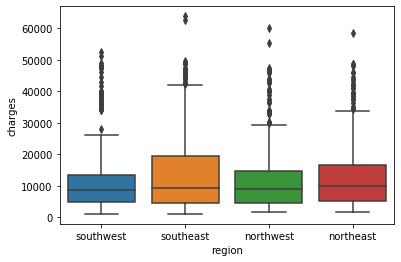

In [27]:
sns.boxplot(data = raw_data, x = 'region', y = 'charges')

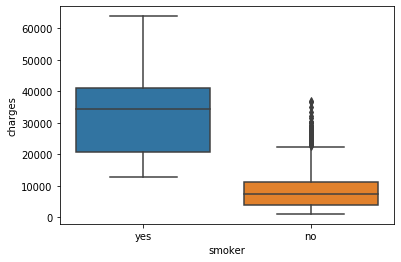

In [28]:
sns.boxplot(data = raw_data, x = 'smoker', y = 'charges')

## i) Pair plot that includes all the columns of the data frame

<function matplotlib.pyplot.show(*args, **kw)>

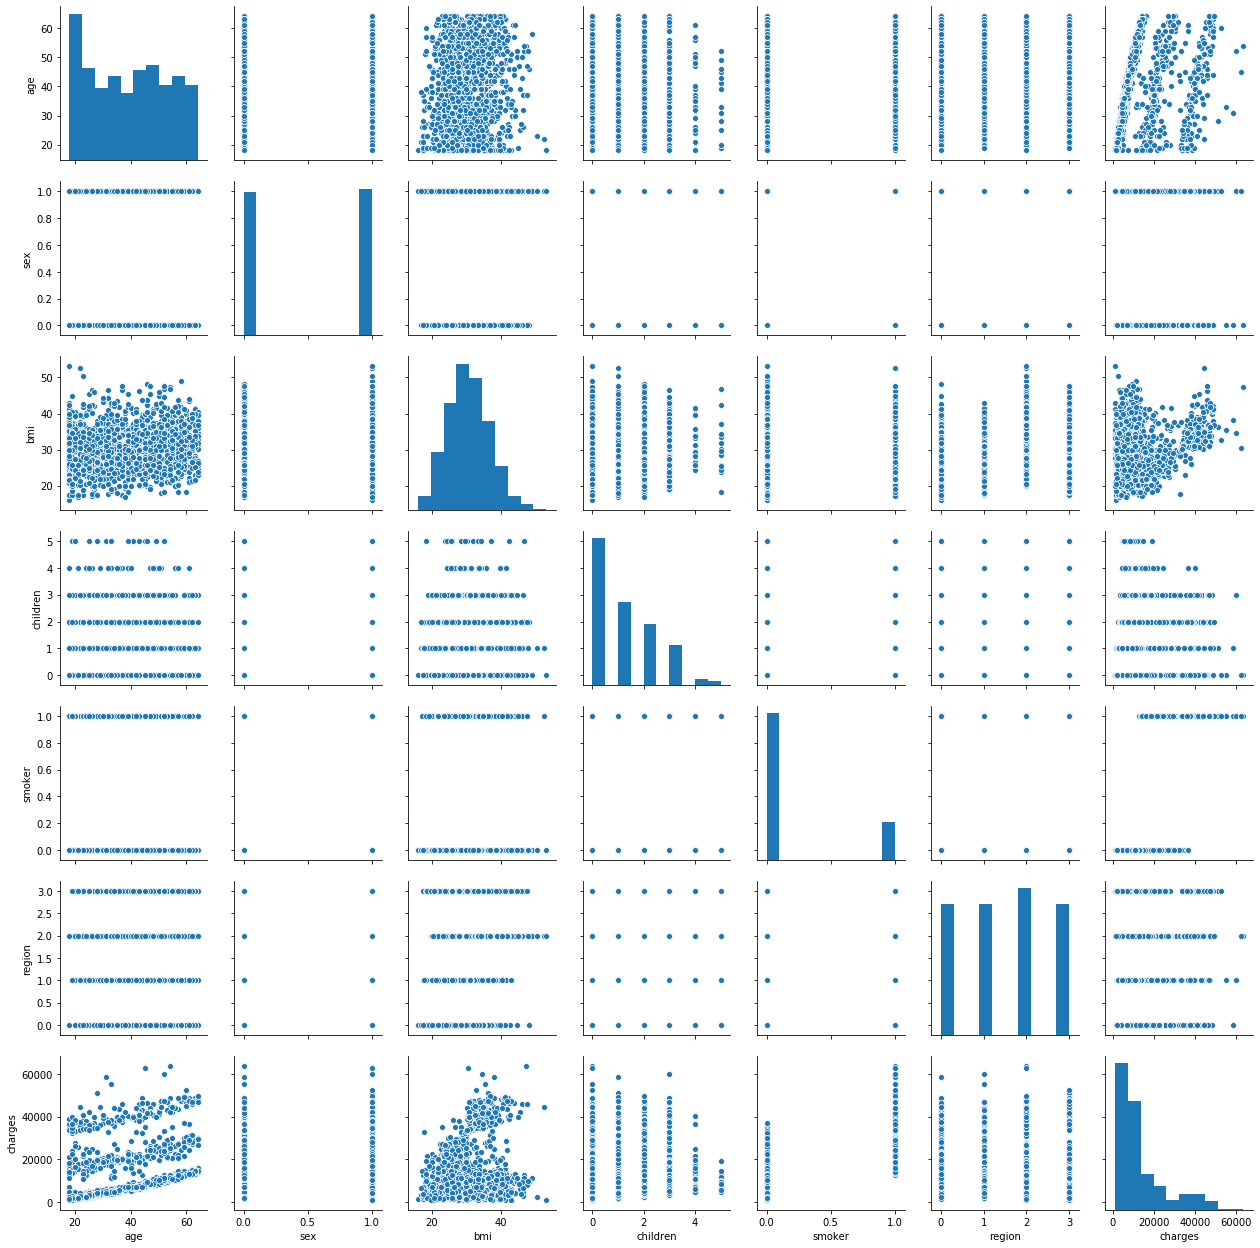

In [31]:
raw_data_encoded = copy.deepcopy(raw_data)
raw_data_encoded.loc[:, ['sex', 'smoker', 'region']] = raw_data.loc[:, ['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform)
sns.pairplot(raw_data_encoded)
plt.show()                                                                 

## 4) Statistical Evidence Questions

## a) Do charges of people who smoke differ significantly from the people who don't?

In [33]:
raw_data.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

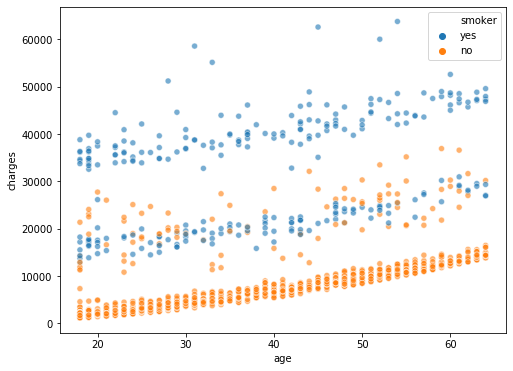

In [36]:
plt.figure(figsize = (8,6))
sns.scatterplot(raw_data.age, raw_data.charges, hue=raw_data.smoker,alpha=0.6)
plt.show()

## Here the relationship is not clear from the graph, hence we will apply the T-test to determine the p-value.

In [41]:
#Applying T-test to determine the impact of smoking on the charges.
Ho = "Charges of smoker & non-smoker are same"   
Ha = "Charges of smoker & non-smoker are not same"

x = np.array(raw_data[raw_data.smoker == 'yes'].charges) 
y = np.array(raw_data[raw_data.smoker == 'no'].charges)

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

print(p_value)

8.271435842177219e-283


The value of p is less than 0.05. Hence, we are rejecting the null hypothesis. Thus, it proves that Smokers pay more charges in comparision of non-smokers.

## b) Does bmi of males differ significantly from that of females?

In [38]:
raw_data.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

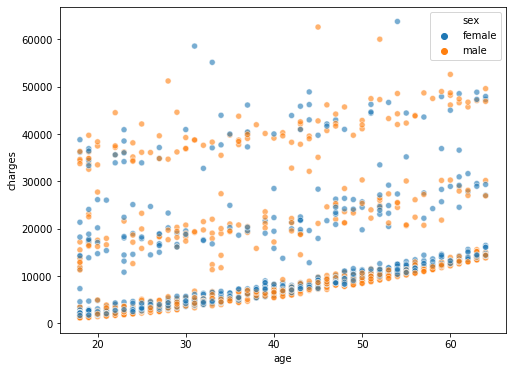

In [39]:
plt.figure(figsize = (8,6))
sns.scatterplot(raw_data.age, raw_data.charges, hue=raw_data.sex,alpha=0.6)
plt.show()

## Applying the T-test to determine the p-value.

In [42]:
Ho = 'BMI of males is same as females'
H1 = "BMI of males differ from females"

x = np.array(raw_data[raw_data.sex == 'male'].bmi)
y = np.array(raw_data[raw_data.sex == 'female'].bmi)

t, p_value = stats.ttest_ind(x,y, axis=0)
print(p_value)

0.08997637178984932


Since the value of p is greater than 0.05, we accept the null hypothesis. This proves that BMI of males doesn't differ from that of females.

## c) Is the proportion of smokers significantly different in different genders?

We will perform the chi-square test to test the notion of proportion of smokers in different genders. 

In [44]:
Ho = "Proportion of smokers is same for both genders"
H1 = "Proportion of smokers is different for different genders"

crosstab = pd.crosstab(raw_data.sex, raw_data.smoker)
chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)
print(p_value)

0.006548143503580696


Since, the value of p value is less than 0.05, we reject the null hypothesis. This test helps us in establishing the fact that Proportion of smokers is different for different genders.

## d) Is the distribution of bmi across women with no children, one child and two children, the same?

In [46]:
# Applying anova test to check the proportion.
Ho = "No. of children has no effect on bmi"   
Ha = "No. of children has an effect on bmi"   

data_f = copy.deepcopy(raw_data[raw_data.sex == 'female'])

zero = data_f[data_f.children == 0]['bmi']
one = data_f[data_f.children == 1]['bmi']
two = data_f[data_f.children == 2]['bmi']

f_stat, p_value = stats.f_oneway(zero,one,two)
print(p_value)

0.7158579926754841


Since, the value of p is greater than 0.05, we accept the null hypothesis. This proves that No. of children have no effect on bmi.